<a href="https://colab.research.google.com/github/hyulianton/jejaringsosial/blob/master/js_Model_Barab%C3%A1si%E2%80%93Albert_(BA)_Tanpa_NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 💻 Model Barabási–Albert (BA) Tanpa NetworkX

### **Cell 1: Impor Library dan Definisi Parameter**

Ini adalah *cell* untuk menyiapkan lingkungan dan parameter utama yang akan mengatur simulasi.

In [1]:
import random
import matplotlib.pyplot as plt
import math
# Jika menggunakan Google Colab, Anda bisa menambahkan:
# from IPython.display import clear_output

# --- PARAMETER MODEL BARABÁSI–ALBERT (BA) ---
N_FINAL = 100      # [N] Jumlah total simpul (node) akhir dalam jaringan
M = 3              # [m] Jumlah tepi (edge) yang ditambahkan setiap simpul baru. m >= 1.
N_INITIAL = M      # Jumlah simpul awal untuk memulai jaringan (sebuah 'klub' awal)

print(f"Parameter Simulasi BA:")
print(f" - Jumlah Simpul Akhir (N): {N_FINAL}")
print(f" - Tepi Baru per Simpul (m): {M}")

Parameter Simulasi BA:
 - Jumlah Simpul Akhir (N): 100
 - Tepi Baru per Simpul (m): 3


### **Cell 2: Fungsi Utama Simulasi Jaringan (create\_ba\_network)**

*Cell* ini berisi logika inti untuk menjalankan proses **Pertumbuhan** dan **Keterikatan Preferensial**.

-----

### **Penjelasan Fungsi `create_ba_network`**

Fungsi ini bertanggung jawab untuk mensimulasikan jaringan BA. Ia menggunakan *dictionary* di Python untuk merepresentasikan **Adjacency List** dari jaringan, di mana *key* adalah simpul (*node*) dan *value* adalah set (kumpulan) dari simpul-simpul tetangganya.

Proses kuncinya ada di loop `while`, di mana simpul baru memilih target berdasarkan probabilitas yang proporsional terhadap derajat (koneksi) simpul yang sudah ada—ini adalah implementasi dari mekanisme **"The Rich Get Richer"** (Keterikatan Preferensial).

-----

In [ ]:
def create_ba_network(N, m):
    """
    Mensimulasikan Model Barabási–Albert (BA) hingga N simpul akhir.
    """
    # 1. INISIALISASI JARINGAN
    # Mulai dengan m simpul yang terhubung penuh (fully connected clique)
    network = {i: set() for i in range(m)}
    for i in range(m):
        for j in range(i + 1, m):
            network[i].add(j) # Hubungkan i ke j
            network[j].add(i) # Hubungkan j ke i (Jaringan tidak berarah)

    current_node = m # Simpul pertama yang akan masuk (m, m+1, ...)

    # 2. PERTUMBUHAN & KETERIKATAN PREFERENSIAL
    while current_node < N:
        # Menghitung Derajat Kumulatif (Total Degree) dari semua simpul
        # Ini penting untuk menentukan probabilitas Preferential Attachment.
        all_possible_targets = []
        for node, neighbors in network.items():
            # Setiap node dimasukkan ke list sebanyak derajatnya.
            # Node dengan derajat tinggi akan memiliki lebih banyak 'tiket' di list ini.
            all_possible_targets.extend([node] * len(neighbors))

        # 3. SIMPUL BARU MASUK
        network[current_node] = set() # Inisialisasi simpul baru tanpa koneksi

        # random.sample: Memilih 'm' target unik dari all_possible_targets.
        # Ini adalah inti dari Keterikatan Preferensial.
        targets = random.sample(all_possible_targets, min(m, len(all_possible_targets)))

        # Tambahkan tepi ke simpul target yang terpilih
        for target in targets:
            # Pastikan simpul tidak terhubung ke dirinya sendiri dan tidak duplikat
            if target != current_node and target not in network[current_node]:
                network[current_node].add(target) # Tambahkan koneksi ke simpul baru
                network[target].add(current_node) # Tambahkan koneksi balik ke simpul target

        current_node += 1 # Pindah ke simpul berikutnya

    return network

### **Cell 3: Fungsi Visualisasi Jaringan (Final State)**

*Cell* ini akan memvisualisasikan struktur akhir jaringan, menyoroti **Hubs** dengan ukuran simpul yang lebih besar.

-----

### **Penjelasan Fungsi `visualize_network_dynamic`**

Fungsi ini memvisualisasikan topologi jaringan. Karena kita tidak menggunakan NetworkX, posisi simpul diplot secara acak (Random Layout) untuk menunjukkan konektivitas.

Aspek kunci dari visualisasi ini adalah:

1.  **Ukuran Simpul Proporsional:** Ukuran simpul (Hubs) disesuaikan berdasarkan derajatnya, sehingga simpul dengan koneksi tinggi (Hubs) terlihat lebih besar.
2.  **Pewarnaan Hubs:** Simpul dengan derajat tertinggi diwarnai merah untuk memudahkan identifikasi.

-----

In [ ]:
def visualize_network_dynamic(network):
    """Memvisualisasikan struktur akhir jaringan BA."""

    # Mengatur posisi simpul (layout acak sederhana)
    pos = {node: (random.random() * 10, random.random() * 10) for node in network}

    # Menghitung derajat dan menyesuaikan ukuran simpul
    degrees = {node: len(neighbors) for node, neighbors in network.items()}
    max_degree = max(degrees.values()) if degrees else 1
    # Ukuran simpul: skala 300 hingga 1300, proporsional terhadap derajat.
    node_sizes = [300 + 1000 * (degrees[node] / max_degree) for node in network]

    plt.figure(figsize=(10, 8))

    # Menggambar Tepi (Edges)
    for node, neighbors in network.items():
        x1, y1 = pos[node]
        for neighbor in neighbors:
            if neighbor > node: # Hanya gambar sekali per edge
                x2, y2 = pos[neighbor]
                plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3)

    # Menggambar Simpul (Nodes)
    x = [pos[node][0] for node in network]
    y = [pos[node][1] for node in network]

    # Pewarnaan: Node dengan derajat tertinggi diwarnai 'red' (Hubs)
    node_colors = ['red' if degrees[node] == max_degree else 'skyblue' for node in network]

    plt.scatter(x, y, s=node_sizes, c=node_colors, edgecolors='black', alpha=0.8, zorder=3)

    plt.title(f'Visualisasi Jaringan Skala-Bebas (N={N_FINAL}, m={M}) - Hubs Disorot')
    plt.axis('off')
    plt.show()

### **Cell 4: Fungsi Visualisasi Distribusi Derajat (Konfirmasi Power Law)**

*Cell* ini adalah bukti matematis. Grafik **Log-Log Plot** akan menunjukkan apakah jaringan yang dihasilkan benar-benar Skala-Bebas.

-----

### **Penjelasan Fungsi `visualize_degree_distribution`**

Fungsi ini menghitung distribusi derajat $P(k)$ dan memplotnya pada skala **Log-Log** (Log dari Probabilitas vs. Log dari Derajat).

Menurut teori, jika jaringan mengikuti Hukum Pangkat ($P(k) \sim k^{-\gamma}$), maka plot Log-Log-nya akan menghasilkan **garis lurus menurun**. Kemampuan untuk menghasilkan garis lurus ini adalah tujuan utama dari simulasi BA.

-----

In [ ]:
def visualize_degree_distribution(network):
    """Membuat histogram distribusi derajat dalam format Log-Log Plot."""

    degrees = [len(neighbors) for neighbors in network.values()]
    if not degrees:
        return

    # 1. Hitung Frekuensi (Count)
    degree_counts = {}
    for degree in degrees:
        degree_counts[degree] = degree_counts.get(degree, 0) + 1

    # 2. Hitung Probabilitas (P(k))
    P_k = [count / N_FINAL for count in degree_counts.values()]
    k_values = list(degree_counts.keys())

    # Sortir data (opsional, untuk plotting yang lebih rapi)
    sorted_data = sorted(zip(k_values, P_k))
    k_values = [item[0] for item in sorted_data]
    P_k = [item[1] for item in sorted_data]

    # 3. Ubah ke Skala Log (Filter P(k) > 0 untuk menghindari log(0))
    log_k = [math.log10(k) for k, P in zip(k_values, P_k) if P > 0 and k > 0]
    log_P_k = [math.log10(P) for P in P_k if P > 0]

    plt.figure(figsize=(8, 6))

    # Plot Log-Log
    plt.plot(log_k, log_P_k, 'o', color='darkblue', alpha=0.7)

    plt.title('Distribusi Derajat - Plot Log-Log (Konfirmasi Power Law)')
    plt.xlabel('Log(Derajat k)')
    plt.ylabel('Log(Probabilitas P(k))')
    plt.grid(True, which="both", ls="--", alpha=0.6)
    plt.show()

### **Cell 5: Eksekusi Simulasi dan Hasil**

Ini adalah *cell* terakhir yang menjalankan semua fungsi yang telah kita definisikan.

Mulai Simulasi Model BA dengan N=100 dan m=3...
Jaringan selesai dibuat. Total simpul: 100.
--------------------------------------------------


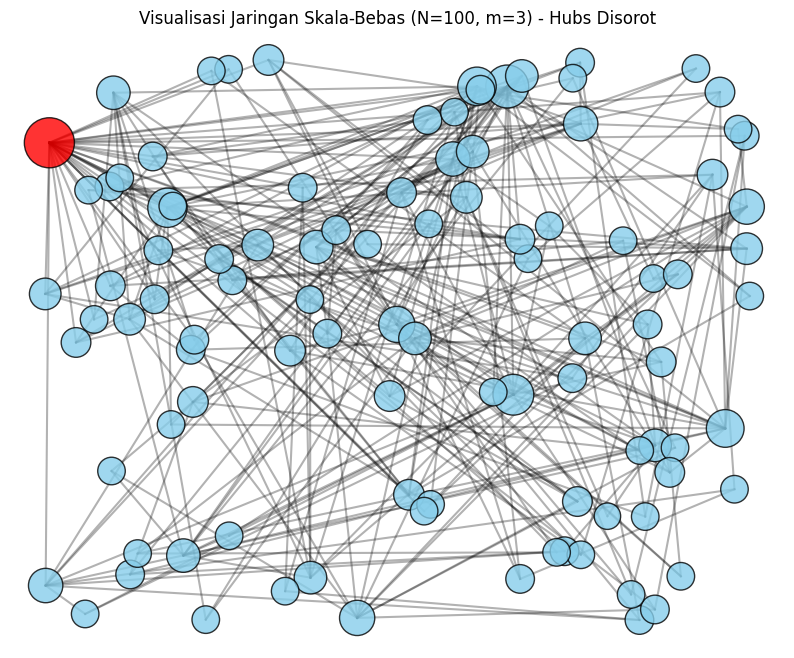

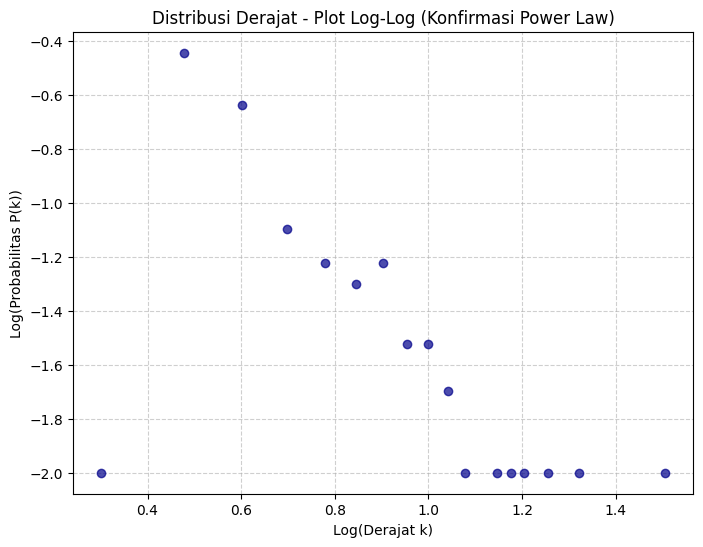

--------------------------------------------------
Jika Plot Log-Log menghasilkan garis lurus menurun, simulasi BA berhasil.


In [ ]:
# --- EKSEKUSI PROGRAM ---
print(f"Mulai Simulasi Model BA dengan N={N_FINAL} dan m={M}...")

# Panggil fungsi utama simulasi
ba_network = create_ba_network(N_FINAL, M)

print(f"Jaringan selesai dibuat. Total simpul: {len(ba_network)}.")
print("-" * 50)

# Visualisasi 1: Topologi Jaringan
visualize_network_dynamic(ba_network)

# Visualisasi 2: Distribusi Derajat (Log-Log Plot)
visualize_degree_distribution(ba_network)

print("-" * 50)
print("Jika Plot Log-Log menghasilkan garis lurus menurun, simulasi BA berhasil.")